# Generate Kaplan Meier Curves 

### Install Necessary Plotting Library
To plot kaplan meier curves the _lifelines_ library is required 

In [1]:
!pip install lifelines -q

In [2]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
from utils.Analysis import Analysis
from utils.Database import Database

## Find prostate cancer patients
Use the Database Class to find mrns for prostate cancer patients

In [4]:
d = Database()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Get list of projects and their UUID

In [5]:
d.fetch_projects()

,name,description,uuid
0,test,test,31cb95c5-7832-41a4-a1ab-08feb6e96694
1,test-simple,test-simple,4b2d7f6f-3f1a-4589-b346-38dbf6fb4d58


### Set Project UUID

In [6]:
d.set_project_uuid('31cb95c5-7832-41a4-a1ab-08feb6e96694')

project_uuid: 31cb95c5-7832-41a4-a1ab-08feb6e96694


In [7]:
patient_filter=[{'tag': 'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']}]

print(f"{patient_filter=}")
mrns = d.get_mrns_where_filters(patient_filter)
print(f"mrns:{mrns}")
# Delete Database Connection
del d

patient_filter=[{'tag': 'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']}]
mrns:['888888', '333333', '111111', '555555', '666666', '777777']


### Create an instance of the Analysis class

In [9]:
a = Analysis()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Define start and event
What tag defines the start time (eg. surgery, radiation)
What tag defines an event (eg. death, biochemical_progression)

In [10]:
icd10 = 'c61'
start_tag = 'surgery'
event_tag = 'biochemical-progression'

### Use the method _kaplan_meier_ to get kaplan meier data

In [11]:
output = a.kaplan_meier(mrns, icd10, start_tag, event_tag)
output

{'mrns': ['333333', '111111', '555555', '666666', '777777'],
 'durations': [717, 3339, 1134, 530, 676],
 'events': [1, 1, 1, 1, 1]}

### Plot The Kaplan Meier Curve

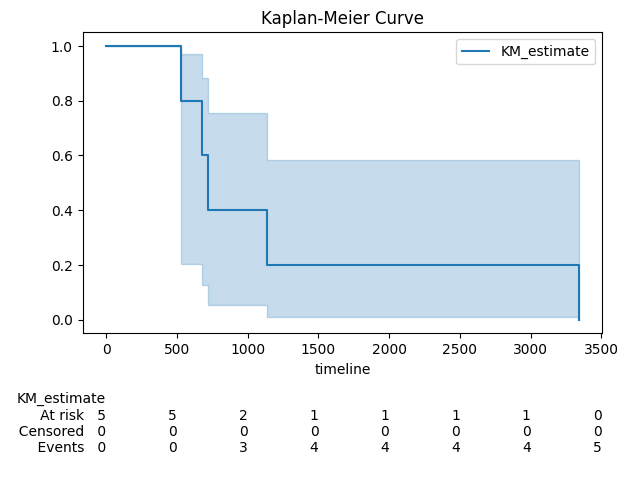

In [12]:
# Extract Data
mrns = output['mrns']
durations = output['durations']
events = output['events']

# Generate Kaplan Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=events)
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Kaplan-Meier Curve')
plt.show()
plt.close()

In [10]:
del a